# Machines Manufacturing Captal Budgeting Model (Project 1)

Insert your description of the model here and add any additional sections below:
- [**Setup**](#Setup): Runs any imports and other setup
- [**Inputs**](#Inputs): Defines the inputs for the model
- [**Machine**](#Machine): Constructs the production of the machine
- [**CashFlow**](#CashFlow): Constructs the cashflow of the business by using initial demand, production, price and cost per phone, and demand growth from advertisement
- [**Sensitivity**](#Sensitivity): Sensitivity Analysis of the model
- [**Scenario**](#Scenario): Scenario Analysis of the model using different economic conditions

## Setup

Setup for the later calculations are here. The necessary packages are imported.

In [1]:
from dataclasses import dataclass
import numpy_financial as npf

## Inputs

All of the inputs for the model are defined here. A class is constructed to manage the data, and an instance of the class containing the default inputs is created.

In [40]:
@dataclass
class ModelInputs:
    n_phones: float = 100000
    price_scrap: float = 50000
    price_phone: float = 500
    cost_machine_adv: float = 1000000
    cogs_phone: float = 250
    n_life: int = 10
    n_machines: int = 5
    d_1: float = 100000
    g_d: float = 0.2
    max_year: float = 20
    interest: float = 0.05
        
    # Inputs for bonus problem
    elasticity: float = 100
    demand_constant: float = 300000
        
model_data = ModelInputs()
data = model_data

## Machine

In [13]:
def find_amount_machines(data, year):
    machines = 0
    for i in range(year):
        years = i + 1
        if (machines < data.n_machines) and (years < data.n_life):
            machines +=1
        elif (data.n_life < years < data.n_life + data.n_machines + 1):
            machines -= 1
    return machines

In [12]:
def find_production(data, year):
    return data.n_phones * find_amount_machines(data, year)

In [ ]:
def find_scrapping(data, year):
    if data.n_life < year < data.n_life + data.n_machines + 1:
        return data.price_scrap
    else:
        return 0

## CashFlow

In [20]:
def find_advertising(data, year):
    if year > data.n_machines:
        return 1
    else:
        return 0

In [36]:
def find_demand(data, year):
    demand = data.d_1
    for i in range(1, year+1):
        demand = demand * (1 + (data.g_d * find_advertising(data, i)))
    return demand

In [39]:
def find_phones_bought(data, year):
    return min(find_production(data, year), find_demand(data, year))

In [45]:
def find_revenue(data, year):
    phones_bought = find_phones_bought(data, year)
    return data.price_phone * phones_bought + find_scrapping(data, year)

In [104]:
def find_costs(data, year):
    return data.cogs_phone * find_phones_bought(data, year) + data.cost_machine_adv


In [105]:
def find_cashflow(data, year):
    return find_revenue(data, year) - find_costs(data, year)

In [108]:
cash_flows = [find_cashflow(data, i) for i in range(1, data.max_year + 1) ]
npv = npf.npv(data.interest, cash_flows) / (1+data.interest) 

In [109]:
npv

369276542.4741534

In [110]:
def find_npv(data):
    year = data.max_year
    cash_flows = [find_cashflow(data, i) for i in range(1, year + 1) ]
    return npf.npv(data.interest, cash_flows) / (1+data.interest) 

## Sensitivity

In [71]:
from sensitivity import SensitivityAnalyzer

In [72]:
def npv_seperate_args(**kwargs):
    data = ModelInputs(**kwargs)
    return find_npv(data)

In [78]:
sensitivity_values = {
    "n_phones": [i *10000 for i in range(8, 12)],
    "price_phone": [i *100 for i in range(4, 9)],
    "cost_machine_adv": [i * 100000 for i in range(8, 24, 8)],
    "cogs_phone": [i * 50 for i in range(3, 6)],
    "n_life": [i for i in range(7, 12)],
    "n_machines": [i for i in range(1, 7)],
    "d_1": [i * 10000 for i in range(9, 15)],
    "g_d": [i/100 for i in range(10, 25, 5)],
    "interest": [i / 100 for i in range(3, 8)]
 }

In [74]:
labels = {
    "n_phones": "Number of phones bought",
    "price_scrap": "Price for scrapping",
    "price_phone": "Price per phone",
    "cost_machine_adv": "Cost for machines or advertisement",
    "cogs_phone": "Cost per phone",
    "n_life": "Amount of years a machine lasts",
    "n_machines": "Amount of machines",
    "d_1": "Initial Demand",
    "g_d": "Amount of percentage gained from ads",
    "max_year": "Amount of years",
    "interest": "Interest Rate"
}

In [79]:
sa = SensitivityAnalyzer(
    sensitivity_values,
    npv_seperate_args,
    result_name = "NPV",
    labels = labels
)

  0%|          | 0/324000 [00:00<?, ?it/s]/Users/marconunez/Documents/Conda/miniconda3/envs/myenv/lib/python3.10/site-packages/sensitivity/df.py:44: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df,pd.DataFrame(pd.Series(base_param_dict)).T])
100%|██████████| 324000/324000 [08:39<00:00, 623.68it/s]


In [86]:
df = sa.df

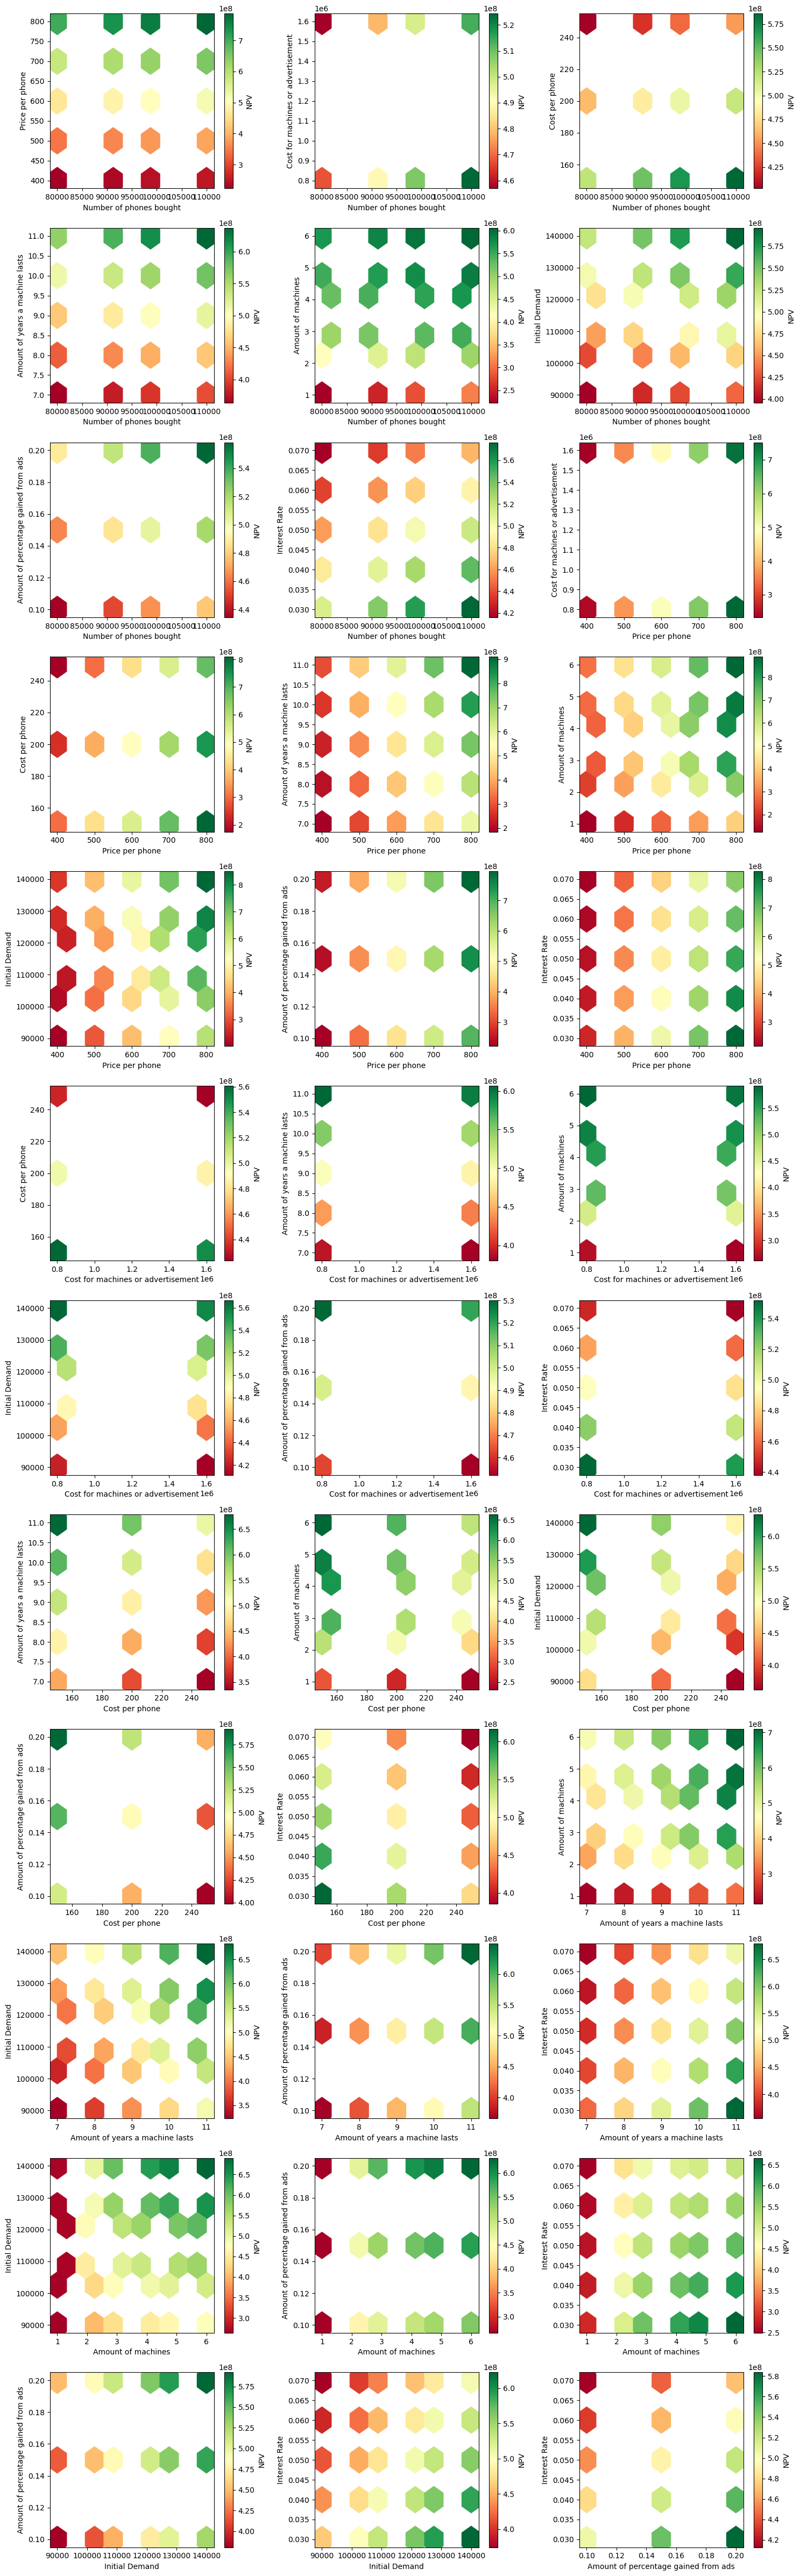

In [85]:
styled = sa.plot()

In [98]:
sa.styled_dfs

<bound method SensitivityAnalyzer.styled_dfs of SensitivityAnalyzer(sensitivity_values={'n_phones': [80000, 90000, 100000, 110000], 'price_phone': [400, 500, 600, 700, 800], 'cost_machine_adv': [800000, 1600000], 'cogs_phone': [150, 200, 250], 'n_life': [7, 8, 9, 10, 11], 'n_machines': [1, 2, 3, 4, 5, 6], 'd_1': [90000, 100000, 110000, 120000, 130000, 140000], 'g_d': [0.1, 0.15, 0.2], 'interest': [0.03, 0.04, 0.05, 0.06, 0.07]}, func=<function npv_seperate_args at 0x10b5d1bd0>, result_name='NPV', agg_func=<function mean at 0x103b92870>, reverse_colors=False, grid_size=8, func_kwargs_dict={}, num_fmt=None, color_map='RdYlGn', labels={'n_phones': 'Number of phones bought', 'price_scrap': 'Price for scrapping', 'price_phone': 'Price per phone', 'cost_machine_adv': 'Cost for machines or advertisement', 'cogs_phone': 'Cost per phone', 'n_life': 'Amount of years a machine lasts', 'n_machines': 'Amount of machines', 'd_1': 'Initial Demand', 'g_d': 'Amount of percentage gained from ads', 'max_

In [100]:
sa.df

,Number of phones bought,Price per phone,Cost for machines or advertisement,Cost per phone,Amount of years a machine lasts,Amount of machines,Initial Demand,Amount of percentage gained from ads,Interest Rate,NPV
0,80000,400,800000,150,7,1,90000,0.1,0.03,116125444.168116
1,80000,400,800000,150,7,1,90000,0.1,0.04,113573581.506574
2,80000,400,800000,150,7,1,90000,0.1,0.05,111081118.724122
3,80000,400,800000,150,7,1,90000,0.1,0.06,108653246.182446
4,80000,400,800000,150,7,1,90000,0.1,0.07,106293454.488215
...,...,...,...,...,...,...,...,...,...,...
323995,110000,800,1600000,250,11,6,140000,0.2,0.03,1504590327.252523
323996,110000,800,1600000,250,11,6,140000,0.2,0.04,1389955952.329398
323997,110000,800,1600000,250,11,6,140000,0.2,0.05,1287098899.981718
323998,110000,800,1600000,250,11,6,140000,0.2,0.06,1194635963.47288


## Scenario

By using Bad, Normal, and Good economic conditions we can test to see how the business will fair during these different conditions. The expected value would take into account all of this with varying percentages of the conditions.

### External 

In [102]:
bad_economy = ModelInputs(
    d_1 = 75000,
    price_phone = 300
)

good_economy = ModelInputs(
    d_1 = 120000,
    price_phone = 700
)

cases = {
    "bad" : bad_economy,
    "normal": data,
    "good" : good_economy
}

In [115]:
for case_type, case_inputs in cases.items():
    npv = find_npv(case_inputs)
    print(f"The Net Present Value of the company is ${npv:.2f} during a {case_type} economy.")

The Net Present Value of the company is $48086465.97 during a bad economy.
The Net Present Value of the company is $369276542.47 during a normal economy.
The Net Present Value of the company is $774241901.45 during a good economy.


In [118]:
case_probabilities = {
    "bad" : .2,
    "normal" : .5,
    "good" : .3
}
expected_value = 0
for case_type, case_inputs in cases.items():
    npv = find_npv(case_inputs)
    weighted_npv = case_probabilities[case_type] * npv
    expected_value += weighted_npv
print(f""""
      The Net Present Value of the company is ${expected_value:.2f} considering a {case_probabilities["bad"]:.0%} chance of bad economy and a {case_probabilities["good"]:.0%} chance of a good economy
      """)

"
      The Net Present Value of the company is $426528134.87 considering a 20% chance of bad economy and a 30% chance of a good economy
      
